In [1]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
X.shape,y.shape

((150, 4), (150,))

# **SCIKIT-LEARN K-MEANS CLUSTERING**

## **FINDING OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD**

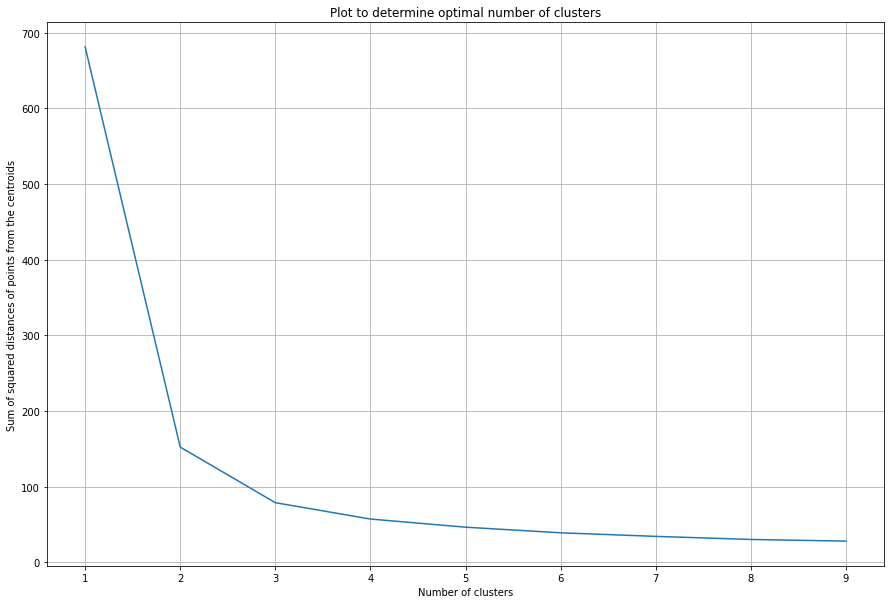

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = [i for i in range(1,10)]
sum_of_squared_distance_values = []

for k in k_values:
  kmeans = KMeans(n_clusters=k,init='random',random_state=10,n_jobs = -1,n_init = 50,max_iter = 1000).fit(X)
  sum_of_squared_distance_values.append(kmeans.inertia_)

plt.figure(figsize=(15,10))
plt.grid()
plt.plot(k_values,sum_of_squared_distance_values)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances of points from the centroids")
plt.title("Plot to determine optimal number of clusters")
plt.show()

**From the above plot it can be concluded that point k = 3 is the elbow point and hence number of clusters is 3**

## **PERFORMING K-MEANS CLUSTERING WITH K = 3**

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='random',random_state=10,n_jobs = -1,n_init = 50,max_iter = 1000).fit(X)
cluster_labels = kmeans.labels_

In [14]:
print(" Sum of squared distances of samples to their closest cluster center: ",kmeans.inertia_)
print("\n Cluster Centroids\n",kmeans.cluster_centers_)
print("\n Number of points in each cluster\n",list(cluster_labels).count(0),list(cluster_labels).count(1),list(cluster_labels).count(2))

 Sum of squared distances of samples to their closest cluster center:  78.85144142614601

 Cluster Centroids
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

 Number of points in each cluster
 62 50 38


# **CUSTOM IMPLEMENTATION OF K-MEANS**

In [3]:
#returns sum of squared distances from each centroid,cluster centroids and cluster labels
def performKMeans(no_of_clusters,X,random_state = 20,tolerance = 0.0001):
  cluster_centroids = []
  np.random.seed(random_state)
  #choose initial centroids randomly
  for i in range(no_of_clusters):
    n = np.random.randint(low = 0,high = X.shape[0]+1)
    cluster_centroids.append(X[n])

  print(" Randomly chosen Initial Cluster Centroids\n",cluster_centroids)
  ##############################################################################
  print("\n K-Means Algorithm Start")
  print("#"*100)
  iteration = 1
  while True:
    cluster_labels = np.zeros(X.shape[0])
    sum_of_squared_distances = 0
    print(" Iteration Number: ",iteration)
    iteration+=1
    #Assign each point to one of the cluster based on distance
    for j in range(X.shape[0]):
      point = X[j]
      min_distance = 0
      cluster_label = -1
      #Computing distance between the points and cluster centroids
      for i in range(no_of_clusters):
        distance = sum((point - cluster_centroids[i])**2)
        if min_distance == 0 or min_distance > distance:
          min_distance = distance
          cluster_label = i
      
      sum_of_squared_distances+=min_distance
      cluster_labels[j] = cluster_label
    ############################################################################
    #Updating cluster centroids based on the clusters assigned in previous step
    print(" Sum of squared distances of all points: ",sum_of_squared_distances)
    count_of_within_tolerance = 0
    for i in range(no_of_clusters):
      indices = np.argwhere(cluster_labels == i)
      no_of_points = float(indices.shape[0])
      centroid = sum(X[indices])/no_of_points
    ############################################################################
    #If the change in centroid coordinates is less than the tolerance specified
    #algorithm converges
      if abs(centroid[0] - cluster_centroids[i]).all() < tolerance:
        count_of_within_tolerance+=1
      cluster_centroids[i] = centroid[0]
    print(" Cluster centroids\n",cluster_centroids)
    print("#"*100)
    if count_of_within_tolerance == no_of_clusters:
      print(" Kmeans Algorithm Converged")
      print("#"*100)
      return sum_of_squared_distances,cluster_centroids,cluster_labels

## **FINDING OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD**

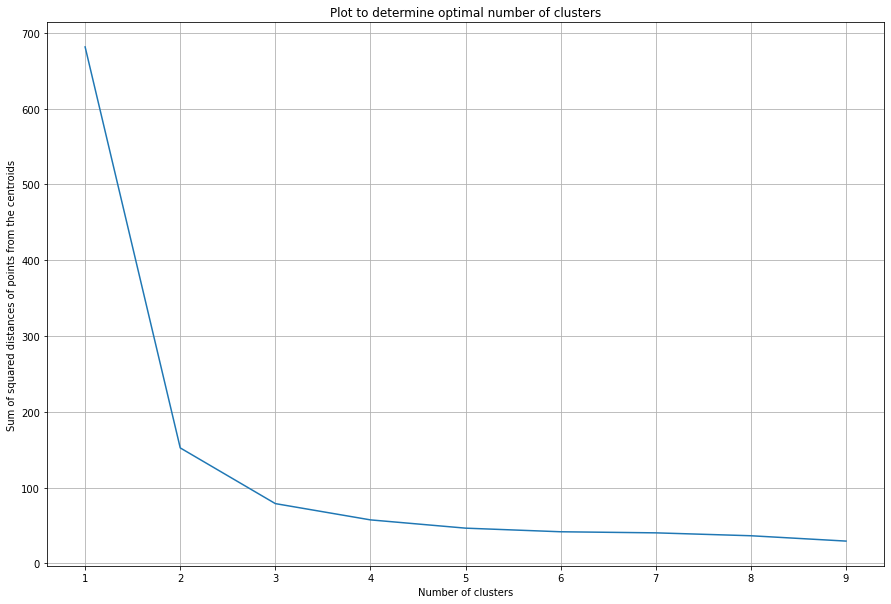

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = [i for i in range(1,10)]
sum_of_squared_distance_values = []

for k in k_values:
  sum_of_squared_distances_from_centroids,cluster_centroids,cluster_labels = performKMeans(k,X)
  sum_of_squared_distance_values.append(sum_of_squared_distances_from_centroids)

plt.figure(figsize=(15,10))
plt.grid()
plt.plot(k_values,sum_of_squared_distance_values)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances of points from the centroids")
plt.title("Plot to determine optimal number of clusters")
plt.show()

**From the above plot it can be concluded that point k = 3 is the elbow point and hence number of clusters is 3**

In [4]:
sum_of_squared_distances,cluster_centroids,cluster_labels = performKMeans(3,X)
print("\n Sum of squared distances of samples to their closest cluster center: ",sum_of_squared_distances)
print("\n Cluster Centroids\n",cluster_centroids)
print("\n Number of points in each cluster\n",list(cluster_labels).count(0),list(cluster_labels).count(1),list(cluster_labels).count(2))

 Randomly chosen Initial Cluster Centroids
 [array([6.5, 3. , 5.2, 2. ]), array([6.8, 3. , 5.5, 2.1]), array([5.4, 3.9, 1.3, 0.4])]

 K-Means Algorithm Start
####################################################################################################
 Iteration Number:  1
 Sum of squared distances of all points:  207.21000000000012
 Cluster centroids
 [array([6.02857143, 2.80571429, 4.58857143, 1.52285714]), array([7.01538462, 3.1       , 5.93461538, 2.14615385]), array([5.03888889, 3.36296296, 1.63333333, 0.32407407])]
####################################################################################################
 Iteration Number:  2
 Sum of squared distances of all points:  85.13735626733414
 Cluster centroids
 [array([5.96060606, 2.76515152, 4.47424242, 1.45909091]), array([6.9       , 3.0969697 , 5.82727273, 2.12727273]), array([5.00784314, 3.40980392, 1.49215686, 0.2627451 ])]
###########################################################################################